In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签`
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8,5) #提前设置图片形状大小

%config InlineBackend.figure_format = 'svg' #在notebook中可以更好的显示，svg输出是一种向量化格式，缩放网页并不会导致图片失真。这行代码似乎只用在ipynb文件中才能使用。

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # 忽略一些warnings

# # This allows multiple outputs from a single jupyter notebook cell:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
pd.set_option('expand_frame_repr', False)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 180)
pd.set_option('display.max.columns', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important; }</style>"))

from RemoteQuery import RemoteSrc
from utils import *
src = RemoteSrc()

In [6]:
date = '20220412'
code1 = '000776'
code2 = '601319'

asset1 = src.get_raw_bars(code1, date)
asset2 = src.get_raw_bars(code2, date)

In [7]:
asset1['midquote'] = (asset1['ask_price1']+asset1['bid_price1'])/2
asset2['midquote'] = (asset2['ask_price1']+asset2['bid_price1'])/2

asset1['delta_quote'] = asset1['midquote'].diff()
asset2['delta_quote'] = asset2['midquote'].diff()

In [8]:
print(asset1.shape)
print(asset2.shape)

(4829, 57)
(4860, 57)


In [74]:
asset1[(asset1['time']>='09:30:00')&(asset1['time'] < '14:57:00')].head()

,date,code,server_time,local_time,preclose,open,high,low,last,upper_limit,lower_limit,volume,turnover,iopv,ask_price1,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,ask_price6,ask_volume6,ask_price7,ask_volume7,ask_price8,ask_volume8,ask_price9,ask_volume9,ask_price10,ask_volume10,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,bid_price5,bid_volume5,bid_price6,bid_volume6,bid_price7,bid_volume7,bid_price8,bid_volume8,bid_price9,bid_volume9,bid_price10,bid_volume10,time,midquote,delta_quote
74,20220601,600837.SSE,2022-06-01 09:30:29,2022-06-01 09:30:29.000,9.13,9.14,9.15,9.12,9.13,10.04,8.22,415300,3794833,0,9.12,4300,9.13,3700,9.14,97600,9.15,106100,9.16,208100,9.17,215600,9.18,218300,9.19,412300,9.2,125600,9.21,43000,9.11,90000,9.1,150800,9.09,131600,9.08,52600,9.07,196900,9.06,106600,9.05,126100,9.04,43000,9.03,120900,9.02,56600,09:30:29,9.115,-0.03
75,20220601,600837.SSE,2022-06-01 09:30:38,2022-06-01 09:30:38.000,9.13,9.14,9.15,9.11,9.12,10.04,8.22,435400,3977986,0,9.12,16700,9.13,7200,9.14,92800,9.15,77900,9.16,206500,9.17,215600,9.18,218300,9.19,412300,9.2,125600,9.21,43000,9.11,79900,9.1,151800,9.09,131600,9.08,52600,9.07,198400,9.06,106600,9.05,126100,9.04,43000,9.03,120900,9.02,56600,09:30:38,9.115,0.00
76,20220601,600837.SSE,2022-06-01 09:30:41,2022-06-01 09:30:41.000,9.13,9.14,9.15,9.11,9.11,10.04,8.22,441000,4029002,0,9.12,31300,9.13,8500,9.14,92800,9.15,79900,9.16,206500,9.17,215600,9.18,218300,9.19,412300,9.2,125600,9.21,43000,9.11,72000,9.1,151800,9.09,131600,9.08,52600,9.07,198400,9.06,106600,9.05,126100,9.04,43000,9.03,120900,9.02,56600,09:30:41,9.115,0.00
77,20220601,600837.SSE,2022-06-01 09:30:44,2022-06-01 09:30:44.000,9.13,9.14,9.15,9.11,9.11,10.04,8.22,460200,4203924,0,9.12,69000,9.13,8500,9.14,88300,9.15,88900,9.16,206500,9.17,215600,9.18,218300,9.19,412300,9.2,125600,9.21,43000,9.11,53900,9.1,151800,9.09,132600,9.08,52600,9.07,198400,9.06,106600,9.05,128400,9.04,43000,9.03,120900,9.02,56600,09:30:44,9.115,0.00
78,20220601,600837.SSE,2022-06-01 09:30:47,2022-06-01 09:30:47.000,9.13,9.14,9.15,9.11,9.11,10.04,8.22,498400,4551952,0,9.12,61400,9.13,5200,9.14,88300,9.15,88900,9.16,206500,9.17,215600,9.18,218300,9.19,412800,9.2,126000,9.21,43000,9.11,23300,9.1,151800,9.09,133600,9.08,52600,9.07,198400,9.06,106600,9.05,129400,9.04,43000,9.03,120900,9.02,56600,09:30:47,9.115,0.00


In [9]:
asset1_ = asset1[asset1['delta_quote'] != 0]
asset2_ = asset2[asset2['delta_quote'] != 0]

In [10]:
asset1_.shape

(1960, 57)

In [11]:
asset2_.shape

(162, 57)

In [12]:
# intraday profile
print(asset1_[(asset1_['time'] > '13:30:00')&(asset1_['time'] < '13:35:00')].shape)
print(asset2_[(asset2_['time'] > '13:30:00')&(asset2_['time'] < '13:35:00')].shape)

(70, 57)
(4, 57)


In [13]:
asset1.set_index('time', inplace=True)
asset2.set_index('time', inplace=True)

In [15]:
asset1_

,date,code,server_time,local_time,preclose,open,high,low,last,upper_limit,lower_limit,volume,turnover,iopv,ask_price1,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,ask_price6,ask_volume6,ask_price7,ask_volume7,ask_price8,ask_volume8,ask_price9,ask_volume9,ask_price10,ask_volume10,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,bid_price5,bid_volume5,bid_price6,bid_volume6,bid_price7,bid_volume7,bid_price8,bid_volume8,bid_price9,bid_volume9,bid_price10,bid_volume10,time,midquote,delta_quote
0,20220412,000776.SZSE,2022-04-12 09:15:00,2022-04-12 09:15:00.000,16.98,16.85,0.00,0.0,0.0,18.68,15.28,0,0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,09:15:00,0.000,NaN
1,20220412,000776.SZSE,2022-04-12 09:15:09,2022-04-12 09:15:09.000,16.98,16.85,0.00,0.0,0.0,18.68,15.28,0,0,0,16.98,17000,0.00,12200,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,16.98,17000,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,09:15:09,16.980,16.980
3,20220412,000776.SZSE,2022-04-12 09:16:03,2022-04-12 09:16:03.000,16.98,16.85,0.00,0.0,0.0,18.68,15.28,0,0,0,16.70,61300,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,16.70,61300,0.00,500,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,09:16:03,16.700,-0.280
7,20220412,000776.SZSE,2022-04-12 09:16:39,2022-04-12 09:16:39.000,16.98,16.85,0.00,0.0,0.0,18.68,15.28,0,0,0,16.68,61600,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,16.68,61600,0.00,12600,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,09:16:39,16.680,-0.020
10,20220412,000776.SZSE,2022-04-12 09:17:06,2022-04-12 09:17:06.000,16.98,16.85,0.00,0.0,0.0,18.68,15.28,0,0,0,16.69,61600,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,16.69,61600,0.00,400,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,09:17:06,16.690,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,20220412,000776.SZSE,2022-04-12 14:57:18,2022-04-12 14:57:18.000,16.98,16.85,18.05,16.7,17.6,18.68,15.28,127568190,2223672252,0,17.59,137700,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,17.59,137700,0.00,25500,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,14:57:18,17.590,-0.020
4814,20220412,000776.SZSE,2022-04-12 14:57:54,2022-04-12 14:57:54.000,16.98,16.85,18.05,16.7,17.6,18.68,15.28,127568190,2223672252,0,17.60,240600,0.00,93200,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,17.60,240600,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,14:57:54,17.600,0.010
4815,20220412,000776.SZSE,2022-04-12 14:58:03,2022-04-12 14:58:03.000,16.98,16.85,18.05,16.7,17.6,18.68,15.28,127568190,2223672252,0,17.59,280300,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,17.59,280300,0.00,120000,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,14:58:03,17.590,-0.010
4817,20220412,000776.SZSE,2022-04-12 14:58:21,2022-04-12 14:58:21.000,16.98,16.85,18.05,16.7,17.6,18.68,15.28,127568190,2223672252,0,17.60,311700,0.00,116500,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.0,0,17.60,311700,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,14:58:21,17.600,0.010


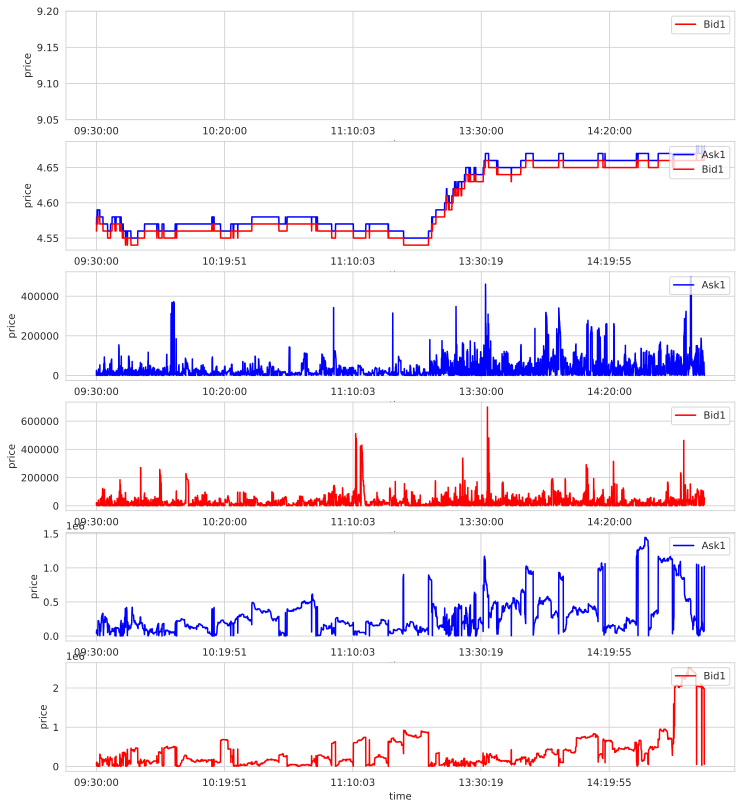

In [14]:
# 上午交易时段
# 09:15 ~ 11:30
sns.set_style("whitegrid")

time1 = '09:30:00'
time2 = '14:56:59'


plt.figure(figsize = (12,14))
plt.subplot(611)
# asset1['ask_price1'].loc[time1:time2].plot(label = 'Ask1',color = 'b')
asset1['bid_price1'].loc[time1:time2].plot(label = 'Bid1',color = 'r')
plt.ylim(9.05,9.2)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)

plt.subplot(612)
asset2['ask_price1'].loc[time1:time2].plot(label = 'Ask1',color = 'b')
asset2['bid_price1'].loc[time1:time2].plot(label = 'Bid1',color = 'r')
# plt.ylim(6980,7110)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)

plt.subplot(613)
asset1['ask_volume1'].loc[time1:time2].plot(label = 'Ask1',color = 'b')
# plt.ylim(6980,7110)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)

plt.subplot(614)
asset1['bid_volume1'].loc[time1:time2].plot(label = 'Bid1',color = 'r')
# plt.ylim(6980,7110)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)

plt.subplot(615)
asset2['ask_volume1'].loc[time1:time2].plot(label = 'Ask1',color = 'b')
# plt.ylim(6980,7110)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)

plt.subplot(616)
asset2['bid_volume1'].loc[time1:time2].plot(label = 'Bid1',color = 'r')
# plt.ylim(6980,7110)
plt.xlabel("time")
plt.ylabel("price")
plt.legend(loc = 1)


**visualize LLR**

maximum lead correlation of pair (000776 vs 600837) (lead = 0:00:01.500000): 0.19604997973283864
maximum lag correlation of pair (000776 vs 600837) (lag = 0:00:08.500000): 0.2542414931517695
Original correlation of pair (000776 vs 600837): 0.18958425601962367
Lead/lag ratio of pair (000776 vs 600837): 0.576316904230102


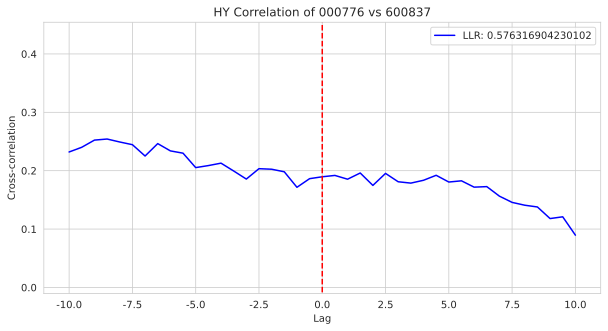

In [2]:
date = '20220428'
code1 = '600837'
code2 = '000776'

# nums = [i/100 for i in list(range(1,10))] + [i/10 for i in list(range(1,10))] + list(range(1,11)) + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
# nums = [i/2 for i in list(range(1,21))] + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
nums = [i/2 for i in list(range(1,21))]
grid = [timedelta(seconds=i) for i in nums]
nums.__len__()

res = obtain_statistics((code1, code2), date, grid)
res
plot_corr(code1, code2, nums=nums, result=res)

maximum lead correlation of pair (600837 vs 000776) (lead = 0:00:08.500000): 0.2542414931517695
maximum lag correlation of pair (600837 vs 000776) (lag = 0:00:01.500000): 0.19604997973283866
Original correlation of pair (600837 vs 000776): 0.1895842560196237
Lead/lag ratio of pair (600837 vs 000776): 1.9451361619040912


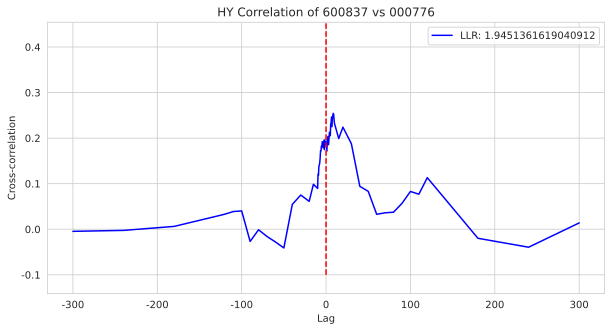

In [3]:
date = '20220428'
code1 = '600837'
code2 = '000776'

# nums = [i/100 for i in list(range(1,10))] + [i/10 for i in list(range(1,10))] + list(range(1,11)) + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
nums = [i/2 for i in list(range(1,21))] + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
# nums = [i/2 for i in list(range(1,21))]
grid = [timedelta(seconds=i) for i in nums]
nums.__len__()

res = obtain_statistics((code1, code2), date, grid)
res
plot_corr(code1, code2, nums=nums, result=res)

maximum lead correlation of pair (600837 vs 000030) (lead = 0:00:07.500000): 0.4362987524751174
maximum lag correlation of pair (600837 vs 000030) (lag = 0:00:00.500000): 0.2634001756428777
Original correlation of pair (600837 vs 000030): 0.2955435019202826
Lead/lag ratio of pair (600837 vs 000030): 5.8479427150241134


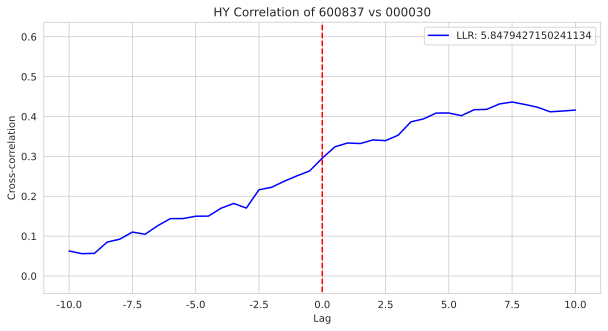

In [7]:
date = '20220601'
code1 = '600837'
code2 = '000030'

# nums = [i/100 for i in list(range(1,10))] + [i/10 for i in list(range(1,10))] + list(range(1,11)) + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
# nums = [i/2 for i in list(range(1,21))] + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
nums = [i/2 for i in list(range(1,21))]
grid = [timedelta(seconds=i) for i in nums]
nums.__len__()

res = obtain_statistics((code1, code2), date, grid)
res
plot_corr(code1, code2, nums=nums, result=res)

maximum lead correlation of pair (600837 vs 000030) (lead = 0:00:07.500000): 0.4362987524751174
maximum lag correlation of pair (600837 vs 000030) (lag = 0:00:00.500000): 0.2634001756428777
Original correlation of pair (600837 vs 000030): 0.2955435019202826
Lead/lag ratio of pair (600837 vs 000030): 7.753689844762403


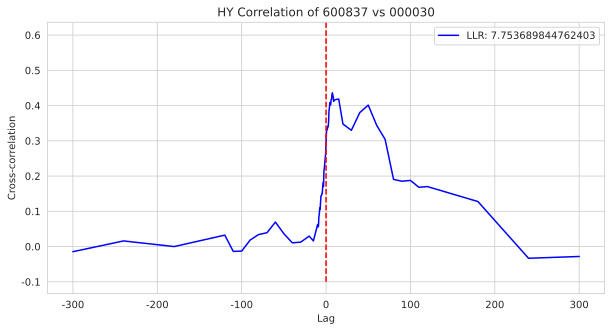

In [6]:
date = '20220601'
code1 = '600837'
code2 = '000030'

# nums = [i/100 for i in list(range(1,10))] + [i/10 for i in list(range(1,10))] + list(range(1,11)) + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
nums = [i/2 for i in list(range(1,21))] + [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 180, 240, 300]
# nums = [i/2 for i in list(range(1,21))]
grid = [timedelta(seconds=i) for i in nums]
nums.__len__()

res = obtain_statistics((code1, code2), date, grid)
res
plot_corr(code1, code2, nums=nums, result=res)

**midquote走势可视化**

In [4]:
server = RemoteSrc()
server.get_raw_bars('301071', '20220517')

EOFError: Compressed file ended before the end-of-stream marker was reached

In [2]:
code1 = '000776'
code2 = '601162'

begin = '2022-04-06'
end = '2022-04-29'

import tushare as ts
ts.set_token('0d86b9a1aa5a9ba78b7e3a2feba63242abaeae62c777f5742f6cf698')
pro = ts.pro_api()
# df = pro.trade_cal(exchange='', start_date=begin, end_date=end, fields='exchange,cal_date,is_open,pretrade_date', is_open='0')
df = ts.get_k_data('sh', start=begin, end=end)
df.tail()

date_list = df['date'].str.replace('-', '').to_list()

date_list = ['20220412']

def process_one_stock2(code, date):
    asset = src.get_raw_bars(code, date)
    begin_time = '09:30:00'
    end_time = '14:57:00'
    range_ = (asset['time'] >= begin_time)&(asset['time'] < end_time)
    asset = asset[range_]
    asset['midquote'] = (asset['ask_price1'] + asset['bid_price1'])/2
    asset['delta_quote'] = asset['midquote'].diff()
    # asset = asset[(asset['delta_quote'] != 0)]
    return asset


asset1 = list(map(lambda date: process_one_stock2(code1, date), date_list))
asset_combined1 = pd.concat(asset1, ignore_index=True)
asset_combined1.sort_values(by=['server_time'], ascending=True, inplace=True)
asset2 = list(map(lambda date: process_one_stock2(code2, date), date_list))
asset_combined2 = pd.concat(asset2, ignore_index=True)
asset_combined2.sort_values(by=['server_time'], ascending=True, inplace=True)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [14]:
asset_combined1, asset_combined2 = remove_zdt(asset_combined1, asset_combined2)

In [15]:
asset1 = asset_combined1[np.abs(asset_combined1['delta_quote']) < 1]
asset2 = asset_combined2[np.abs(asset_combined2['delta_quote']) < 1]
asset1.set_index('server_time', inplace=True)
asset2.set_index('server_time', inplace=True)

In [16]:
asset2.shape

(4744, 58)

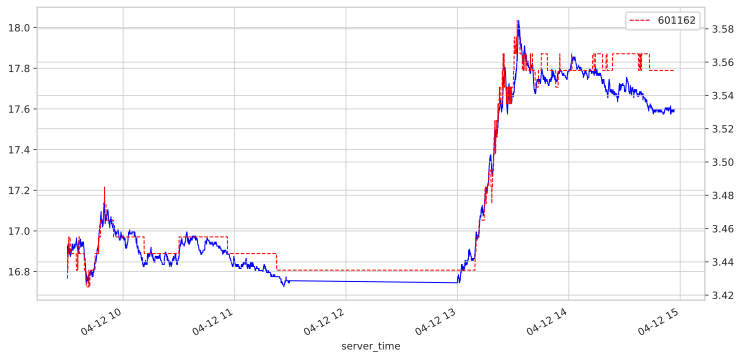

In [17]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
asset1['midquote'].plot(kind='line', label = '%s'%code1, ax=ax, color='b', linewidth=1, legend=True)
ax.legend(loc=0)
ax_r = ax.twinx()
asset2['midquote'].plot(kind='line', label = '%s'%code2, ax=ax_r, color='r', linestyle='--', linewidth=1,legend=True)
ax_r.legend(loc=0)

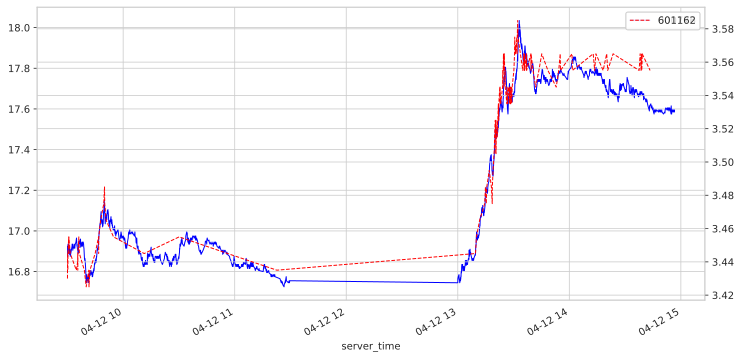

In [18]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
(asset1.loc[asset1['delta_quote'] != 0,'midquote']).plot(kind='line', label = '%s'%code1, ax=ax, color='b', linewidth=1, legend=True)
ax.legend(loc=0)
ax_r = ax.twinx()
(asset2.loc[asset2['delta_quote'] != 0,'midquote']).plot(kind='line', label = '%s'%code2, ax=ax_r, color='r', linestyle='--', linewidth=1,legend=True)
ax_r.legend(loc=0)

In [13]:
asset1.head()

,server_time,date,code,local_time,preclose,open,high,low,last,upper_limit,lower_limit,volume,turnover,iopv,ask_price1,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,ask_price6,ask_volume6,ask_price7,ask_volume7,ask_price8,ask_volume8,ask_price9,ask_volume9,ask_price10,ask_volume10,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,bid_price5,bid_volume5,bid_price6,bid_volume6,bid_price7,bid_volume7,bid_price8,bid_volume8,bid_price9,bid_volume9,bid_price10,bid_volume10,time,midquote,delta_quote
0,2022-04-12 09:30:03,20220412,000776.SZSE,2022-04-12 09:30:03.000,16.98,16.85,16.95,16.85,16.95,18.68,15.28,584600,9868195,0,16.95,25400,16.96,16400,16.97,87600,16.98,26700,16.99,14500,17.00,45500,17.01,100,17.02,5900,17.03,2200,17.04,1500,16.90,22100,16.89,1600,16.87,22100,16.86,101500,16.85,158200,16.84,43700,16.83,51000,16.82,72200,16.81,76900,16.80,79200,09:30:03,16.925,0.050
1,2022-04-12 09:30:06,20220412,000776.SZSE,2022-04-12 09:30:06.000,16.98,16.85,16.95,16.85,16.90,18.68,15.28,652200,11010319,0,16.90,1500,16.93,4600,16.94,13000,16.95,27700,16.96,22400,16.97,93400,16.98,25200,16.99,15900,17.00,47000,17.01,100,16.88,5700,16.87,14600,16.86,110200,16.85,177600,16.84,44100,16.83,54400,16.82,72100,16.81,80100,16.80,90200,16.79,100,09:30:06,16.890,-0.035
2,2022-04-12 09:30:09,20220412,000776.SZSE,2022-04-12 09:30:09.000,16.98,16.85,16.95,16.85,16.88,18.68,15.28,687300,11603544,0,16.88,42,16.89,500,16.90,8100,16.93,600,16.94,20600,16.95,23600,16.96,19100,16.97,87600,16.98,25200,16.99,15900,16.87,11400,16.86,95900,16.85,179000,16.84,44100,16.83,54900,16.82,72100,16.81,81100,16.80,93400,16.79,100,16.78,26900,09:30:09,16.875,-0.015
3,2022-04-12 09:30:15,20220412,000776.SZSE,2022-04-12 09:30:15.000,16.98,16.85,16.95,16.85,16.90,18.68,15.28,763900,12896200,0,16.93,10800,16.94,12200,16.95,23600,16.96,20100,16.97,87100,16.98,21900,16.99,15900,17.00,45600,17.01,100,17.02,5900,16.90,11100,16.88,14900,16.87,200,16.86,90900,16.85,195400,16.84,44100,16.83,56800,16.82,70100,16.81,86100,16.80,93400,09:30:15,16.915,0.040
4,2022-04-12 09:30:18,20220412,000776.SZSE,2022-04-12 09:30:18.000,16.98,16.85,16.95,16.85,16.90,18.68,15.28,798600,13482942,0,16.93,1100,16.94,11000,16.95,23600,16.96,20100,16.97,87100,16.98,21900,16.99,15900,17.00,45600,17.01,100,17.02,5900,16.92,300,16.91,400,16.90,9000,16.88,18600,16.87,600,16.86,90300,16.85,195400,16.84,44100,16.83,56800,16.82,69300,09:30:18,16.925,0.010


In [19]:
asset1.reset_index(inplace=True)
asset2.reset_index(inplace=True)

In [31]:
hy_corr(asset1, asset2, timedelta(seconds=0), 'lead')

0.09219154761493348

In [63]:
np.corrcoef([1,2,3,4,5], [2,4,6,8,10])

array([[1., 1.],
       [1., 1.]])

In [5]:
date_list = ['20220428']
a = preprocess(code1, ['20220412', '20220413'])
b = preprocess(code2, ['20220412', '20220413'])
a.head()

,code,delta_quote,server_time
0,000776.SZSE,NaN,2022-04-12 09:30:00
1,000776.SZSE,0.050,2022-04-12 09:30:03
2,000776.SZSE,-0.035,2022-04-12 09:30:06
3,000776.SZSE,-0.015,2022-04-12 09:30:09
4,000776.SZSE,0.000,2022-04-12 09:30:12


In [11]:
a[a['server_time'].diff() > timedelta(hours=8)]

,code,delta_quote,server_time
4740,000776.SZSE,NaN,2022-04-13 09:30:00


In [14]:
a[a['delta_quote'].notnull()]

,code,delta_quote,server_time
1,000776.SZSE,0.050,2022-04-12 09:30:03
2,000776.SZSE,-0.035,2022-04-12 09:30:06
3,000776.SZSE,-0.015,2022-04-12 09:30:09
4,000776.SZSE,0.000,2022-04-12 09:30:12
5,000776.SZSE,0.040,2022-04-12 09:30:15
...,...,...,...
9474,000776.SZSE,0.000,2022-04-13 14:56:45
9475,000776.SZSE,0.000,2022-04-13 14:56:48
9476,000776.SZSE,0.000,2022-04-13 14:56:51
9477,000776.SZSE,0.000,2022-04-13 14:56:54


In [4]:
a, b = remove_zdt(a, b)
a.tail()

,code,delta_quote,server_time,limit,choice
1481,000776.SZSE,0.01,2022-04-28 14:23:45,0,0
1482,000776.SZSE,-0.01,2022-04-28 14:24:12,0,0
1483,000776.SZSE,-0.02,2022-04-28 14:24:33,0,0
1484,000776.SZSE,-0.01,2022-04-28 14:24:51,0,0
1485,000776.SZSE,0.01,2022-04-28 14:25:00,0,0


In [27]:
asset2[['code', 'delta_quote', 'server_time']].shape

(1428, 3)

In [34]:
src = RemoteSrc()
s = src.get_raw_bars(code2, '20220412')


In [44]:
s.iloc[0]['server_time'].date() + timedelta(days=1)

datetime.date(2022, 4, 13)

In [8]:
%%time
from tqdm import tqdm, trange

a = list(map(lambda x: x**2, tqdm(list(range(1000000)))))

100%|██████████| 1000000/1000000 [00:00<00:00, 1920733.58it/s]

CPU times: user 518 ms, sys: 75.6 ms, total: 593 ms
Wall time: 587 ms


In [10]:
a = 0
for i in tqdm(range(10000000)):
    a += i

100%|██████████| 10000000/10000000 [00:02<00:00, 3381313.77it/s]


In [13]:
import numba 
from numba import prange

for i in tqdm(prange(100000)):
    a+=i

100%|██████████| 100000/100000 [00:00<00:00, 2459713.82it/s]
